<a href="https://colab.research.google.com/github/AnaghaWani/BESem8/blob/main/DL/dl3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [166]:
(trainx,trainy),(testx,testy)=tf.keras.datasets.fashion_mnist.load_data()

trainx=trainx.reshape((trainx.shape[0],28,28,1))
testx=testx.reshape((testx.shape[0],28,28,1))

trainy_cat=tf.keras.utils.to_categorical(trainy)
testy_cat=tf.keras.utils.to_categorical(testy)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [167]:
train_norm = trainx.astype('float32') #covert pixel value from integer to float
test_norm = testx.astype('float32')

train_norm = train_norm / 255.0 #scale all the pixel from 0-1
test_norm = test_norm / 255.0

In [168]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

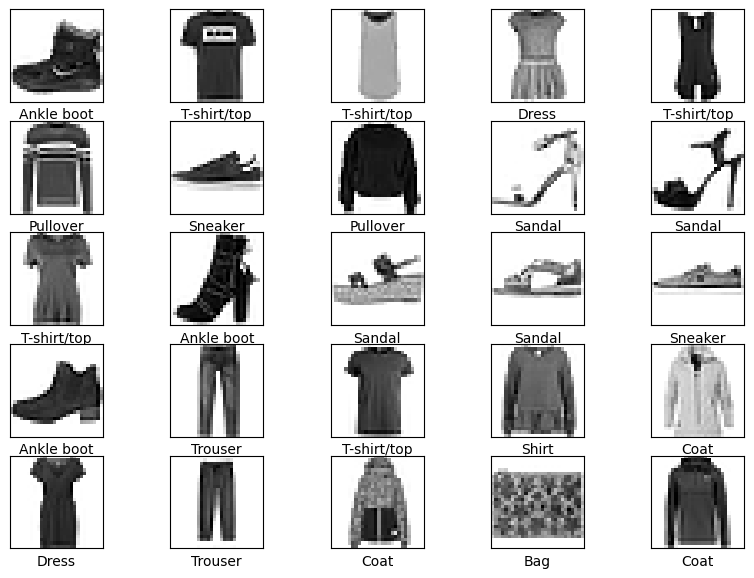

In [169]:
plt.figure(figsize=(10,7))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainx[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[trainy[i]])
plt.show()

In [170]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,kernel_size=(3,3),input_shape=(28,28,1),activation='relu',padding='same',name='covolutional-layer-1'),
    tf.keras.layers.AvgPool2D(pool_size=(2,2),name='pooling-layer-1'),
    tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',padding='same',name='covolutional-layer-2'),
    tf.keras.layers.AvgPool2D(pool_size=(2,2),name='pooling-layer-2'),
    tf.keras.layers.GlobalAveragePooling2D(name='pooling-layer-3'),
    tf.keras.layers.Dense(len(class_names),activation='softmax',name='output-layer')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [171]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ covolutional-layer-1 (Conv2D)   │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling-layer-1                 │ (None, 14, 14, 64)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ covolutional-layer-2 (Conv2D)   │ (None, 14, 14, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling-layer-2                 │ (None, 7, 7, 32)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling-layer-3                 │ (None, 32)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output-layer (Dense)            │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,434 (75.91 KB)

 Trainable params: 19,434 (75.91 KB)

 Non-trainable params: 0 (0.00 B)

In [172]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [174]:
history = model.fit(trainx, trainy_cat, epochs=10, validation_data=(testx, testy_cat))

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 43ms/step - accuracy: 0.8101 - loss: 0.5427 - val_accuracy: 0.8413 - val_loss: 0.4906


In [175]:
model.evaluate(testx, testy_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8424 - loss: 0.4751


[0.4905525743961334, 0.8413000106811523]

In [176]:
pred = model.predict(testx)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step


In [177]:
pred = tf.argmax(pred, axis=1)#convert raw predictions into class label

In [178]:
y_test = tf.argmax(testy_cat, axis=1) #convert one hot encoded label back into class indices

In [179]:
y_test = tf.Variable(y_test)

In [180]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8413

In [181]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.78      0.77      0.78      1000
           1       0.99      0.95      0.97      1000
           2       0.78      0.76      0.77      1000
           3       0.80      0.86      0.83      1000
           4       0.72      0.73      0.72      1000
           5       0.96      0.94      0.95      1000
           6       0.63      0.54      0.58      1000
           7       0.94      0.92      0.93      1000
           8       0.87      0.98      0.92      1000
           9       0.92      0.95      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



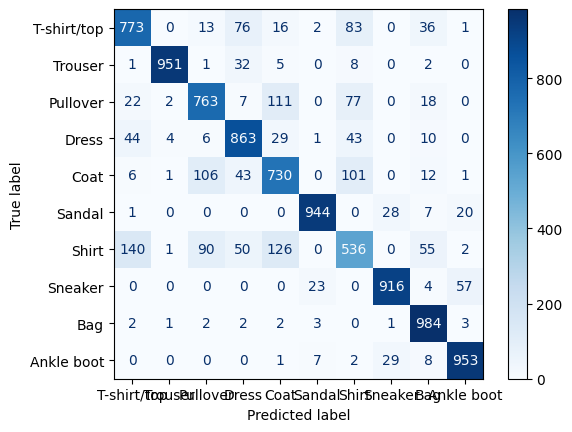

In [182]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap="Blues")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


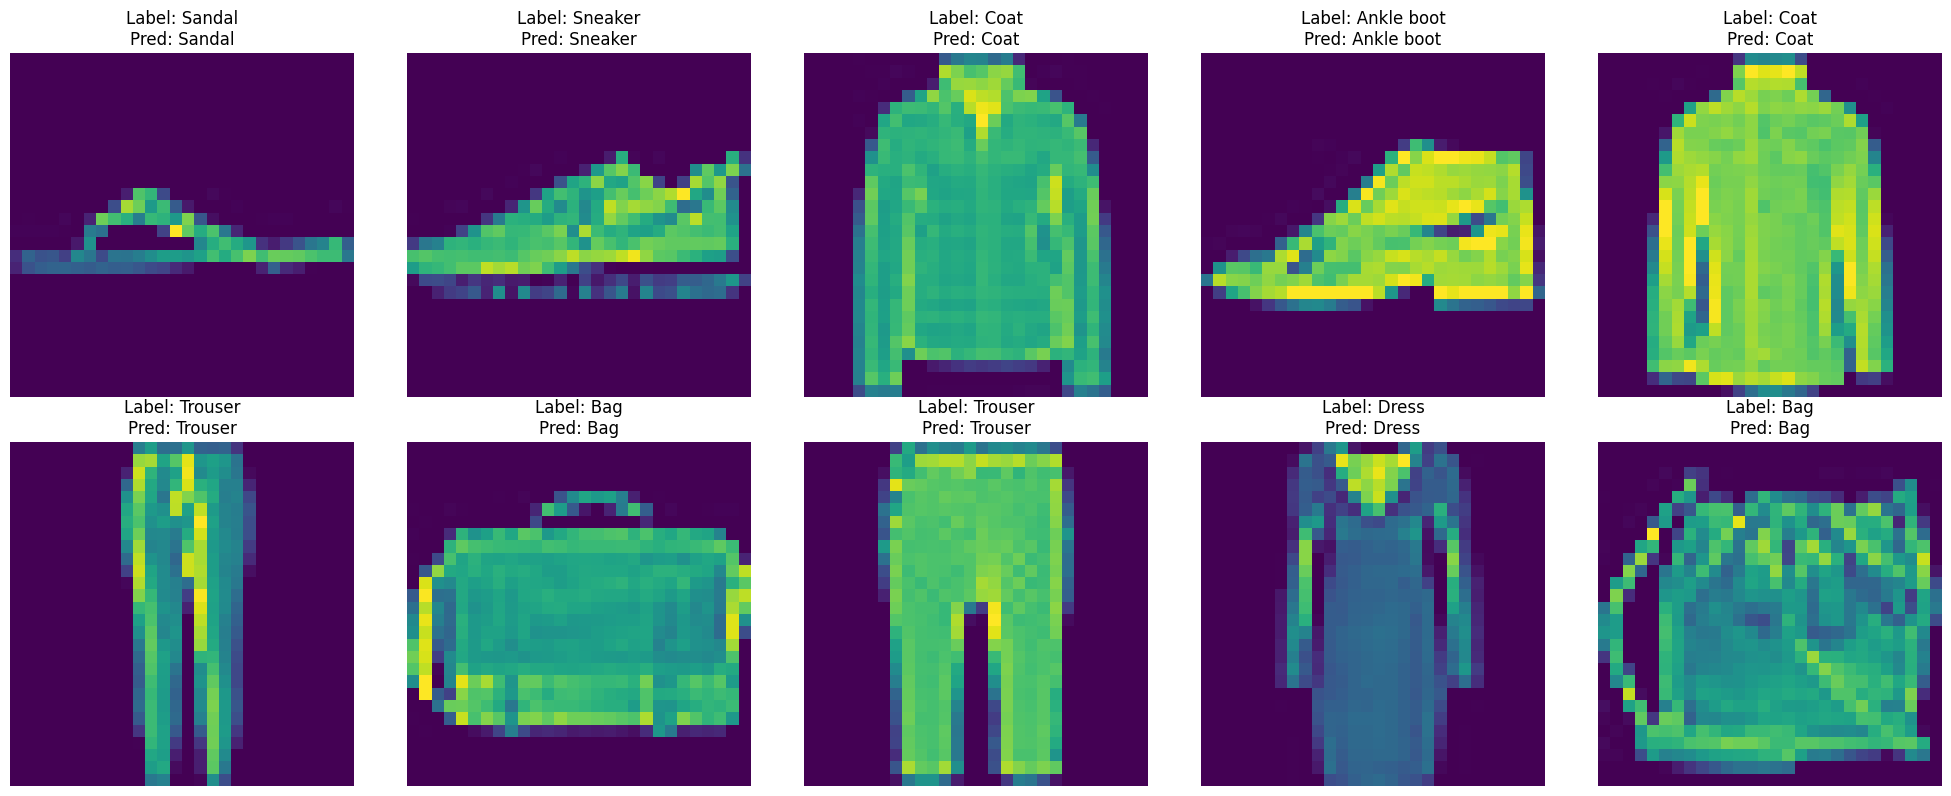

In [183]:
import random
# Randomly select 10 test samples
indices = random.sample(range(len(testx)), 10)
images = np.array([testx[i] for i in indices])
labels = np.array([testy_cat[i] for i in indices])

# Plot predictions
plt.figure(figsize=(20, 8))
for i, (img, lbl) in enumerate(zip(images, labels), 1):
    pred = class_names[tf.argmax(model.predict(tf.expand_dims(img, axis=0)), axis=1).numpy()[0]]
    true = class_names[tf.argmax(lbl)]
    plt.subplot(2, 5, i)
    plt.title(f"Label: {true}\nPred: {pred}")
    plt.imshow(img / 255.)
    plt.axis("off")
plt.tight_layout()
plt.show()